In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dt.csv', sep=',', parse_dates=['date'])

In [3]:
df.head()

,date,client,transportation_mode,revenue_usd,cost_usd,profit_usd,margin_percent
0,2022-01-04 15:37:47,Noble Associates,SEA,2320.36,2188.60,247.05,10.65
1,2022-01-17 22:42:02,Advanced Systems,SEA,9650.86,8643.69,431.47,4.47
2,2022-01-19 05:37:59,Alfa Resources,SEA,1026.93,727.15,175.58,17.10
3,2022-01-16 05:33:26,Eternal Alliance,SEA,6312.09,5698.86,387.15,6.13
4,2022-01-04 23:42:46,Core Dynamics,SEA,17951.05,16542.72,270.96,1.51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13244 entries, 0 to 13243
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 13244 non-null  datetime64[ns]
 1   client               13244 non-null  object        
 2   transportation_mode  13244 non-null  object        
 3   revenue_usd          13244 non-null  float64       
 4   cost_usd             13244 non-null  float64       
 5   profit_usd           13244 non-null  float64       
 6   margin_percent       13244 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 724.4+ KB


In [5]:
df = df.sort_values(['client', 'date'])
df

,date,client,transportation_mode,revenue_usd,cost_usd,profit_usd,margin_percent
3269,2022-06-01 13:11:18,Active Alliance,ROAD,3886.30,4106.24,483.54,12.44
3233,2022-06-28 08:45:04,Active Alliance,ROAD,3190.10,3399.17,111.72,3.50
11149,2022-11-27 02:06:26,Active Associates,AIR,2366.69,1947.91,365.76,15.45
11913,2022-12-16 20:44:25,Active Associates,ROAD,4281.01,4076.82,342.06,7.99
12370,2022-12-28 20:59:16,Active Associates,AIR,1748.97,1733.12,180.06,10.30
...,...,...,...,...,...,...,...
2515,2022-05-10 12:00:09,Visionary Technologies,AIR,5424.80,4758.25,1104.05,20.35
2520,2022-05-17 16:01:39,Visionary Technologies,AIR,2042.70,973.07,930.41,45.55
4437,2022-08-24 21:03:19,Visionary Trust,SEA,318.22,234.93,38.04,11.95
3512,2022-06-13 20:41:43,Visionary Ventures,ROAD,2094.59,1785.84,139.78,6.67


In [10]:
df2 = df.groupby('client').agg(
    purchase_sum = ('revenue_usd', 'sum'),
    purchase_amount = ('revenue_usd', 'count'),
    last_purchase = ('date', 'last'),
).reset_index()

In [11]:
df[df['client'] == 'Advanced Corporation']

,date,client,transportation_mode,revenue_usd,cost_usd,profit_usd,margin_percent
560,2022-01-02 13:26:28,Advanced Corporation,SEA,4516.59,4227.73,189.21,4.19
453,2022-01-03 18:08:25,Advanced Corporation,SEA,11828.39,11426.56,256.85,2.17
527,2022-01-19 19:24:27,Advanced Corporation,SEA,4538.60,4152.55,333.59,7.35
1059,2022-02-13 20:41:39,Advanced Corporation,RAIL,1705.94,1510.99,189.62,11.12
1014,2022-02-24 21:55:11,Advanced Corporation,RAIL,1501.99,1218.51,136.08,9.06
1542,2022-03-04 06:41:54,Advanced Corporation,RAIL,1752.26,1513.80,140.21,8.00
1645,2022-03-04 14:10:47,Advanced Corporation,RAIL,1955.25,1932.28,64.33,3.29
1661,2022-03-15 04:10:53,Advanced Corporation,RAIL,1470.50,1457.37,180.82,12.30
1644,2022-03-27 10:32:32,Advanced Corporation,RAIL,1909.59,1850.04,60.13,3.15
1563,2022-03-28 00:20:31,Advanced Corporation,RAIL,1541.17,1429.54,210.75,13.67


In [13]:
df2.sort_values('purchase_amount')

,client,purchase_sum,purchase_amount,last_purchase
296,Leading Global,1904.84,1,2022-03-15 13:26:31
437,Pro Global,931.34,1,2022-12-17 20:50:05
120,Creative Alliance,2060.68,1,2022-05-06 18:58:29
436,Pro Foundation,1642.35,1,2022-11-09 21:10:02
243,Innovative Consulting,4215.07,1,2022-04-11 17:17:53
...,...,...,...,...
225,Infinite Capital,434027.02,227,2022-12-21 07:07:24
136,Creative Trust,418835.97,238,2022-12-27 17:27:09
52,Ambitious Connections,473498.78,249,2022-12-28 20:22:46
561,United Associates,1391221.54,529,2022-12-27 23:44:12


In [14]:
df2['days_since_last_purchase'] = (max(df['date']) - df2['last_purchase']).dt.days

In [15]:
df2

,client,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase
0,Active Alliance,7076.40,2,2022-06-28 08:45:04,183
1,Active Associates,8396.67,3,2022-12-28 20:59:16,0
2,Active Consulting,25277.48,17,2022-12-19 17:32:42,9
3,Active Dynamics,17864.54,9,2022-10-21 02:49:10,68
4,Active Edge,29018.49,10,2022-10-04 16:46:03,85
...,...,...,...,...,...
589,Visionary Systems,29553.23,9,2022-10-28 05:11:41,61
590,Visionary Tech,24498.08,2,2022-01-17 08:48:06,345
591,Visionary Technologies,7467.50,2,2022-05-17 16:01:39,225
592,Visionary Trust,318.22,1,2022-08-24 21:03:19,126


In [16]:
quantiles = [round(i, 2) for i in np.arange(0.1, 1.1, 0.1)]

In [17]:
df2['purchase_sum'].quantile(quantiles)

0.1       1063.941
0.2       1795.202
0.3       2705.776
0.4       4103.904
0.5       6927.745
0.6      10523.402
0.7      17120.105
0.8      30576.040
0.9     103311.501
1.0    2131043.410
Name: purchase_sum, dtype: float64

In [18]:
quantiles = [0.33, 0.66]

In [19]:
df2['days_since_last_purchase'].quantile(quantiles)

0.33     38.00
0.66    131.38
Name: days_since_last_purchase, dtype: float64

In [15]:
def calculate_rfm_score(value: float, metric_type: str, lower_threshold: float, upper_threshold: float) -> int:
    """
    Определяет RFM-оценку на основе значения и порогов квартилей.

    :param value: Значение для оценки (например, дни с последней покупки, частота, сумма)
    :param metric_type: Тип оценки ('R' - для Recency, 'F' - для Frequency, 'M' - для Monetary)
    :param lower_threshold: Порог для первого терциля (33-й перцентиль)
    :param upper_threshold: Порог для второго терциля (66-й перцентиль)
    :return: Оценка от 1 до 3 в зависимости от значения
    """
    if value < lower_threshold:
        return 3 if metric_type != 'R' else 1  # Высокий приоритет для 'F' и 'M', низкий для 'R'
    elif value < upper_threshold:
        return 2  # Средний приоритет для всех переменных
    else:
        return 1 if metric_type != 'R' else 3  # Низкий приоритет для 'F' и 'M', высокий для 'R'

# Задаем квантили для расчета порогов
quantile_thresholds = [0.33, 0.66]

# Расчет оценок для Recency (времени с последней покупки)
recency_thresholds = df2['days_since_last_purchase'].quantile(quantile_thresholds)
df2['RecencyScore'] = df2['days_since_last_purchase'].apply(
    calculate_rfm_score, 
    args=('R', recency_thresholds.iloc[0], recency_thresholds.iloc[1])
)

# Расчет оценок для Frequency (количества покупок)
frequency_thresholds = df2['purchase_amount'].quantile(quantile_thresholds)
df2['FrequencyScore'] = df2['purchase_amount'].apply(
    calculate_rfm_score, 
    args=('F', frequency_thresholds.iloc[0], frequency_thresholds.iloc[1])
)

# Расчет оценок для Monetary (суммы покупок)
monetary_thresholds = df2['purchase_sum'].quantile(quantile_thresholds)
df2['MonetaryScore'] = df2['purchase_sum'].apply(
    calculate_rfm_score, 
    args=('M', monetary_thresholds.iloc[0], monetary_thresholds.iloc[1])
)

In [16]:
df2

,client,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,RecencyScore,FrequencyScore,MonetaryScore
0,Active Alliance,7076.40,2,2022-06-28 08:45:04,183,3,2,2
1,Active Associates,8396.67,3,2022-12-28 20:59:16,0,1,2,2
2,Active Consulting,25277.48,17,2022-12-19 17:32:42,9,1,1,1
3,Active Dynamics,17864.54,9,2022-10-21 02:49:10,68,2,1,1
4,Active Edge,29018.49,10,2022-10-04 16:46:03,85,2,1,1
...,...,...,...,...,...,...,...,...
589,Visionary Systems,29553.23,9,2022-10-28 05:11:41,61,2,1,1
590,Visionary Tech,24498.08,2,2022-01-17 08:48:06,345,3,2,1
591,Visionary Technologies,7467.50,2,2022-05-17 16:01:39,225,3,2,2
592,Visionary Trust,318.22,1,2022-08-24 21:03:19,126,2,3,3


In [17]:
df2['RFM'] = df2.apply(lambda row: f"{row['RecencyScore']}{row['FrequencyScore']}{row['MonetaryScore']}", axis=1)

In [18]:
df3 = df2.groupby('RFM')['RFM'].agg({'count'}).reset_index().sort_values('count', ascending=False)

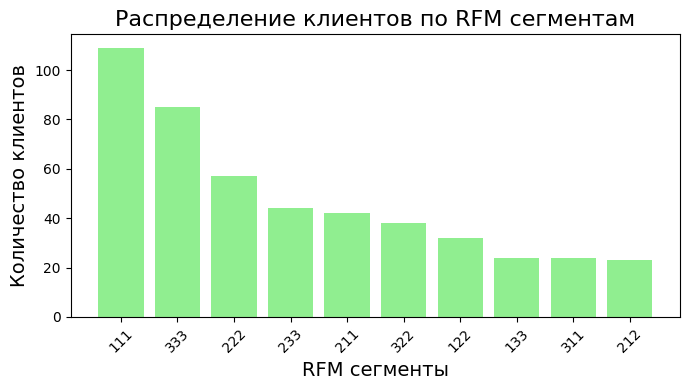

In [19]:
df3_top_10 = df3.head(10)

plt.figure(figsize=(7, 4))

plt.bar(df3_top_10['RFM'], df3_top_10['count'], color='lightgreen')

plt.xlabel('RFM сегменты', fontsize=14)

plt.ylabel('Количество клиентов', fontsize=14)

plt.title('Распределение клиентов по RFM сегментам', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

Рассмотрим клиентов для первых четырех сегментов и выпишем стратегии

In [20]:
df2[df2['RFM'] == '111']

,client,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,RecencyScore,FrequencyScore,MonetaryScore,RFM
2,Active Consulting,25277.48,17,2022-12-19 17:32:42,9,1,1,1,111
9,Active Management,14476.31,10,2022-12-14 13:09:43,14,1,1,1,111
12,Active Services,23485.32,11,2022-12-02 00:26:16,26,1,1,1,111
19,Advanced Alliance,21968.83,12,2022-12-28 10:14:39,0,1,1,1,111
20,Advanced Capital,145397.60,66,2022-12-28 19:35:39,0,1,1,1,111
...,...,...,...,...,...,...,...,...,...
567,United Group,254067.34,35,2022-12-24 12:08:18,4,1,1,1,111
574,United Solutions,24996.43,11,2022-12-17 02:17:44,11,1,1,1,111
582,Visionary Foundation,56772.17,29,2022-12-10 14:24:47,18,1,1,1,111
583,Visionary Group,275467.99,227,2022-12-28 19:29:24,0,1,1,1,111


Сегмент 111 включает клиентов с низкой активностью и ценностью. Основная стратегия для них – попытка реанимировать интерес с помощью специальных акций, значительных скидок и напоминаний. Однако затраты на этот сегмент должны быть минимальными, так как эффективность таких усилий может быть невысокой.

In [21]:
df2[df2['RFM'] == '333']

,client,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,RecencyScore,FrequencyScore,MonetaryScore,RFM
5,Active Holdings,713.54,1,2022-06-02 04:03:24,209,3,3,3,333
7,Active Initiative,442.08,1,2022-05-13 14:52:56,229,3,3,3,333
11,Active Resources,1317.53,1,2022-08-01 06:02:15,149,3,3,3,333
15,Active Tech,378.56,1,2022-05-28 07:04:27,214,3,3,3,333
16,Active Technologies,501.10,1,2022-02-23 13:40:24,308,3,3,3,333
...,...,...,...,...,...,...,...,...,...
562,United Corporation,1760.42,1,2022-05-12 05:53:25,230,3,3,3,333
564,United Edge,478.74,1,2022-03-03 11:24:24,300,3,3,3,333
572,United Resources,1191.58,1,2022-03-01 14:35:48,302,3,3,3,333
581,Visionary Edge,1639.52,1,2022-03-09 23:26:12,294,3,3,3,333


Сегмент 333 – это лояльные клиенты с высокой частотой покупок и значительной ценностью. Для них важно поддерживать привязанность через программы лояльности, персонализированные предложения и эксклюзивные бонусы. Также стоит использовать кросс-продажи и предлагать премиальные товары, чтобы укрепить их интерес.

In [22]:
df2[df2['RFM'] == '222']

,client,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,RecencyScore,FrequencyScore,MonetaryScore,RFM
13,Active Solutions,5870.26,3,2022-10-24 23:51:05,65,2,2,2,222
40,Alfa Group,4103.12,3,2022-10-14 10:10:37,75,2,2,2,222
42,Alfa Industries,3109.18,4,2022-10-11 05:42:13,78,2,2,2,222
43,Alfa Management,7729.19,4,2022-09-25 07:39:41,94,2,2,2,222
44,Alfa Networks,4131.60,2,2022-08-20 12:56:33,130,2,2,2,222
53,Ambitious Consulting,4381.62,3,2022-10-04 01:37:56,85,2,2,2,222
61,Ambitious Innovation,4697.83,4,2022-11-20 08:38:49,38,2,2,2,222
70,Bright Alliance,7332.87,3,2022-10-24 15:33:37,65,2,2,2,222
98,Brilliant Operations,11903.74,4,2022-11-12 00:58:48,46,2,2,2,222
109,Core Foundation,8832.14,3,2022-11-19 15:35:30,39,2,2,2,222


Клиенты из сегмента 222 показывают средние результаты по всем метрикам, поэтому их важно удерживать через регулярные акции и промо-коды. Персонализация предложений на основе их прошлых покупок поможет стимулировать рост активности, а мотивация к увеличению среднего чека через дополнительные бонусы может повысить их ценность

In [23]:
df2[df2['RFM'] == '233']

,client,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,RecencyScore,FrequencyScore,MonetaryScore,RFM
18,Active Ventures,743.25,1,2022-10-18 06:42:59,71,2,3,3,233
27,Advanced Framework,1984.03,1,2022-08-28 06:41:52,122,2,3,3,233
62,Ambitious Management,1437.96,1,2022-11-18 19:53:51,40,2,3,3,233
86,Brilliant Connections,1198.67,1,2022-10-04 22:44:52,85,2,3,3,233
105,Core Consulting,1370.69,1,2022-11-10 03:59:17,48,2,3,3,233
108,Core Enterprises,1012.50,1,2022-09-03 10:23:52,116,2,3,3,233
117,Core Tech,2033.52,1,2022-10-05 09:44:25,84,2,3,3,233
135,Creative Systems,1608.11,1,2022-09-13 20:09:40,106,2,3,3,233
139,Dynamic Consulting,706.79,1,2022-11-02 17:49:48,56,2,3,3,233
166,Elite Innovation,905.71,1,2022-11-06 05:04:57,52,2,3,3,233


Сегмент 233 представляет собой клиентов, которые совершают редкие, но крупные покупки. Здесь эффективна стратегия напоминаний о пополнении запасов или сезонных скидках, а также предложение дополнительных премиальных услуг и товаров для увеличения их интереса.